In [7]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
import patsy
import statsmodels.api as sm
%matplotlib inline

In [8]:
#load data
like_data = np.loadtxt('like_data.txt')#  #like data for the 10 days.
#If the subject is missing entries, the end is padded with NaN. Note that we have day 1 and day 10 ratings for everyone.
#Some subjects are missing intervening days. We 
preferences = np.loadtxt('pref_summary.txt')#4 columns: repeated day 10, repeated day 1, control day 10, control day 1

# mean center
centered_preferences = np.zeros([preferences.shape[0],preferences.shape[1]])
for n,row in enumerate(preferences):
    like_mean = np.mean([row[0],row[1]])
    ctrl_mean = np.mean([row[2],row[3]])
    centered_preferences[n,:] = [row[0] - like_mean , row[1] - like_mean, 
                            row[2] - ctrl_mean , row[3] - ctrl_mean]

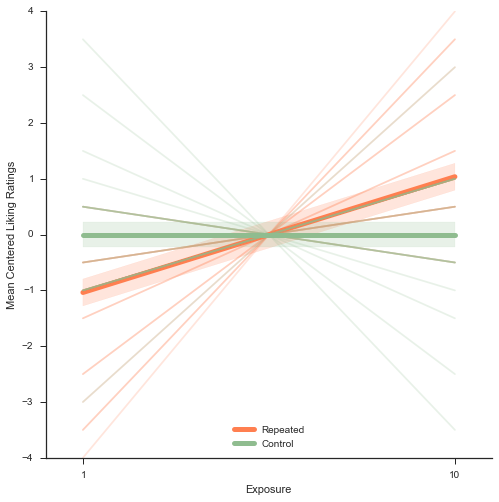

In [11]:
# sns.set_context("poster", {"axes.labelsize": 22, "legend.fontsize": 20, "xtick.labelsize":20,"ytick.labelsize":20})
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(8, 8))
sns.tsplot(np.c_[centered_preferences[:,1],centered_preferences[:,0]], condition = ['Repeated'],
           err_style=["unit_traces","ci_band"],lw=5, color = 'coral')
sns.tsplot(np.c_[centered_preferences[:,3],centered_preferences[:,2]], condition = ['Control'],
           err_style=["unit_traces","ci_band"],lw=5,color='darkseagreen')
ax.set(xlim=(-.1, 1.1), xticks=[0, 1], xticklabels=["1", "10"])
ax.xaxis.grid(False)
ax.set_xlabel('Exposure')
ax.set_ylabel('Mean Centered Liking Ratings')
sns.despine()
# plt.savefig('/Users/ianballard/Desktop/pref_change/images/mean_centered_ratings.png', dpi=600,orientation='landscape',bbox_inches="tight")


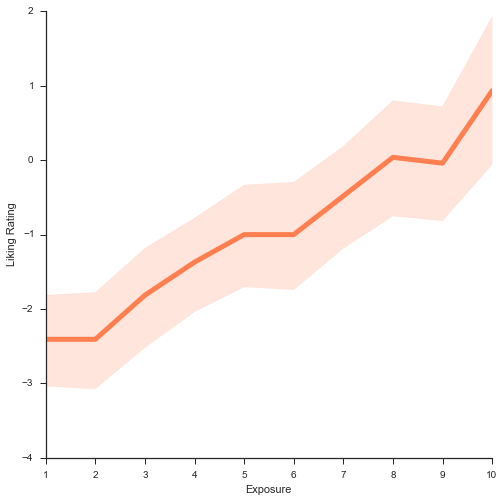

In [14]:
#plots the liking ratings, day by day
f, ax = plt.subplots(figsize=(8, 8))
# sns.set_context("poster", {"axes.labelsize": 22, "legend.fontsize": 20, "xtick.labelsize":20,"ytick.labelsize":20})
sns.tsplot(like_data,
           err_style=["ci_band"],lw=5, color = 'coral',estimator=np.nanmean)
ax.set(xticks=[0,1,2,3,4,5,6,7,8,9],  xticklabels=["1","2","3","4","5","6","7","8","9","10"])
ax.xaxis.grid(False)
sns.despine()
sns.set_style("ticks")
ax.set_ylabel('Liking Rating')
ax.set_xlabel('Exposure')
# plt.savefig('/Users/ianballard/Desktop/pref_change/images/ratings_time.png', dpi=600,orientation='landscape',bbox_inches="tight")



In [3]:
##test for linear and quadratic trends
linear = range(like_data.shape[1])
linear = linear - np.mean(linear)
quadratic = map(lambda x: x**2, linear)
quadratic = quadratic - np.mean(quadratic)

betas = np.zeros((like_data.shape[0],3))
for i in range(like_data.shape[0]):
    data = {'ratings':like_data[i,:],'linear':linear,'quadratic':quadratic}
    data = pd.DataFrame(data)
    
    y,X = patsy.dmatrices("ratings ~ 1+linear+quadratic",data,NA_action='drop')
    est = sm.OLS(y, X).fit()
    
    betas[i,:] = est.params

t,p = scipy.stats.ttest_1samp(betas,0)
print t,p

NameError: name 'scipy' is not defined